# Exercise 2 - Whitening

In [9]:
import pandas as pd

df = pd.read_csv("pca4.csv")
df = df - df.mean()
df.head()

,X1,X2,X3,X4
0,2.220150,0.001445,-0.029699,0.531402
1,-1.080816,-4.940798,-0.399039,0.856469
2,0.325880,1.386070,-0.077879,0.379079
3,0.455902,-1.510588,0.001842,0.323533
4,2.868266,3.784841,0.253395,-0.086477


In [10]:
df.describe()

,X1,X2,X3,X4
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-8.526513e-17,-9.947598e-17,1.065814e-17,-1.065814e-17
std,1.705942e+00,1.774020e+00,8.176849e-01,8.230961e-01
min,-5.832747e+00,-5.237948e+00,-1.197964e+01,-1.198725e+01
25%,-1.232995e+00,-1.097631e+00,-2.020266e-01,-2.097426e-01
50%,-5.812232e-03,-1.079210e-01,9.313042e-03,-2.251317e-02
75%,1.078714e+00,1.253088e+00,2.145907e-01,2.137377e-01
max,4.712177e+00,4.916961e+00,1.202036e+01,1.201275e+01


In [139]:
import numpy as np

X = df.T.to_numpy()
C = np.cov(X)

In [140]:
from numpy.linalg import eig
e, M = eig(C)
sort_perm = e.argsort()[::-1]
e = e[sort_perm]
M = M[:,sort_perm]
print("Eigenvalues:", e)
print("Eigenvectors:", M)

Eigenvalues: [4.13329173 1.92436473 0.67762223 0.66820255]
Eigenvectors: [[-0.66808317 -0.7440606   0.00612014  0.00111974]
 [-0.74406218  0.66802535 -0.00553581 -0.00910804]
 [ 0.00594509 -0.0054947   0.16150367 -0.98683891]
 [ 0.00100359 -0.00926113 -0.98683761 -0.16144585]]


## Outlier detection

### Using last two PCs

In [141]:
U = M[:,2:].T @ X
U.shape

(2, 500)

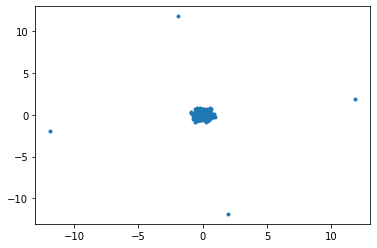

In [142]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(U[0], U[1], ".")

### Using last PC

In [143]:
U = M[:,3:].T @ X
U.shape

(1, 500)

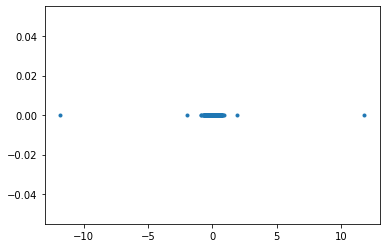

In [144]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(U[0], np.zeros_like(U[0]), ".")

### Indices of outliers

In [33]:
i_pca1_outl = [index for index, x in zip(np.arange(len(U[0])), U[0]) if x < -5 or x > 5]
i_pca1_outl

[99, 111]

In [35]:
i_pca2_outl = [index for index, x in zip(np.arange(len(U[1])), U[1]) if x < -5 or x > 5]
i_pca2_outl

[199, 211]

In [38]:
print(X[:,99])
print(X[:,111])

print(X[:,199])
print(X[:,211])

[-5.81223172e-03 -1.07921002e-01  2.03597930e-02  1.20127503e+01]
[-5.81223172e-03 -1.07921002e-01  2.03597930e-02 -1.19872497e+01]
[-5.81223172e-03 -1.07921002e-01  1.20203598e+01  1.27503055e-02]
[-5.81223172e-03 -1.07921002e-01 -1.19796402e+01  1.27503055e-02]


## Clean data

In [145]:
Xc = np.delete(X, [99, 111, 199, 211], axis=1)

In [146]:
Cc = np.cov(Xc)
ec, Mc = eig(Cc)
sort_perm = ec.argsort()[::-1]
ec = ec[sort_perm]
Mc = Mc[:,sort_perm]
print("Eigenvalues:", ec)
print("Eigenvectors:", Mc)

Eigenvalues: [4.16661605 1.93983139 0.10130627 0.09181741]
Eigenvectors: [[-6.68104504e-01 -7.44055712e-01 -4.17917429e-03 -6.26106300e-05]
 [-7.44049527e-01  6.68077013e-01  3.80086963e-03  6.99713062e-03]
 [ 5.09285464e-03 -3.76143205e-03 -1.59278874e-01  9.87213328e-01]
 [ 8.58062441e-04 -6.32882723e-03  9.87217468e-01  1.59251001e-01]]


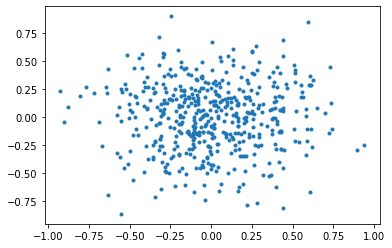

In [49]:
Uc = Mc[:,2:].T @ Xc
fig, ax = plt.subplots()

ax.plot(Uc[0], Uc[1], ".")

In [52]:
def pca_for_subset(X, subset_size):
    C = np.cov(X[:,:subset_size])
    e, M = eig(C)
    sort_perm = e.argsort()[::-1]
    e = e[sort_perm]
    M = M[:,sort_perm]
    return e, M

In [53]:
pca_for_subset(Xc, 100)

(array([3.64560049, 2.00907825, 0.10776192, 0.09518386]),
 array([[ 0.68475065,  0.72819958,  0.02371242, -0.01672286],
        [ 0.7277    , -0.68480404, -0.01023928, -0.03729996],
        [-0.03059766,  0.02283869, -0.44779295, -0.8933217 ],
        [-0.02516031, -0.01572257,  0.89376415, -0.44755492]]))

## PCA for subset with reasonable size

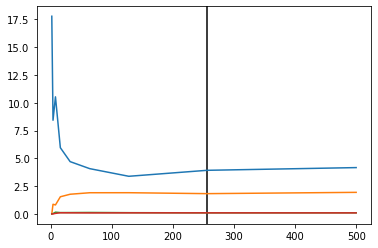

In [175]:
fig, ax = plt.subplots()

x = [2**i for i in np.arange(1, 9)] + [500]
ys = [pca_for_subset(Xc, size)[0] for size in x]

reasonable_size = 256
ax.axvline(reasonable_size, color="black")
ax.plot(x, ys)

<BarContainer object of 4 artists>

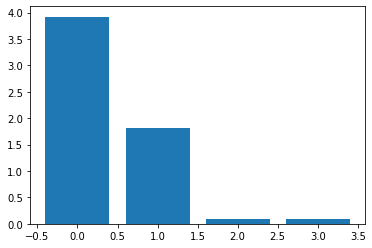

In [176]:
fig, ax = plt.subplots()

e, M = pca_for_subset(Xc, reasonable_size)
ax.bar(np.arange(len(e)), e)

## Whiten data

In [177]:
e, M = pca_for_subset(Xc, Xc.shape[1])

Edit: is `e` the correct vector to use? Should't the variances along the PCAs be used?

In [178]:
Lambda = np.diag(e)
Lambda

array([[4.16661605, 0.        , 0.        , 0.        ],
       [0.        , 1.93983139, 0.        , 0.        ],
       [0.        , 0.        , 0.10130627, 0.        ],
       [0.        , 0.        , 0.        , 0.09181741]])

In [179]:
np.sqrt(Lambda)

array([[2.04122905, 0.        , 0.        , 0.        ],
       [0.        , 1.3927783 , 0.        , 0.        ],
       [0.        , 0.        , 0.31828646, 0.        ],
       [0.        , 0.        , 0.        , 0.30301388]])

In [180]:
from numpy.linalg import inv

V = inv(np.sqrt(Lambda)) @ M.T @ Xc
V

array([[-0.72704353,  2.15409406, -0.61193421, ...,  1.15223373,
         1.13291949, -0.35297934],
       [-1.18769874, -1.79537985,  0.48925368, ...,  0.35676327,
         1.45924978,  0.20341509],
       [ 1.63395818,  2.81135742,  1.22701998, ..., -1.73239501,
        -0.32004665,  1.12804541],
       [ 0.18209655, -0.96380602, -0.02256096, ..., -0.10898519,
         0.35350726,  0.20029901]])

In [181]:
def draw_heatmap(matrix, ax):
    im = ax.imshow(matrix)
    size = matrix.shape[0]
    for i in np.arange(size):
        for j in np.arange(size):
            text = ax.text(j, i, "%.2f" % matrix[i, j],
                           ha="center", va="center", color="w")
            
def draw_heatmap_row(matrices):
    fig, axs = plt.subplots(ncols=len(matrices), figsize=(15, 15))
    for i in np.arange(len(matrices)):
        draw_heatmap(matrices[i], axs[i])

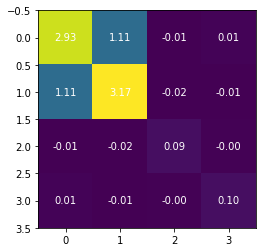

In [182]:
fig, ax = plt.subplots()
draw_heatmap(np.cov(Xc), ax)

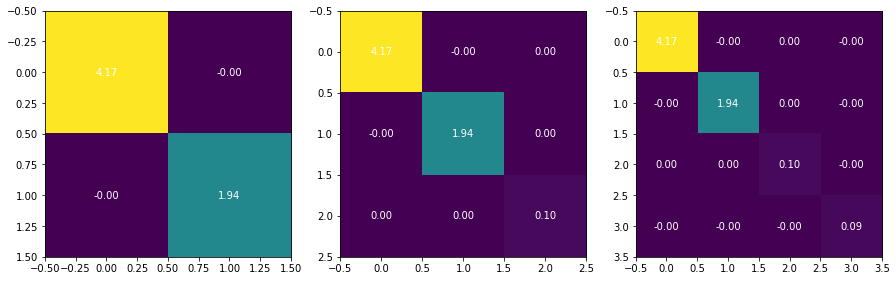

In [183]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 15))
        
for num_pcs in [2, 3, 4]:
    U_e = M[:,:num_pcs].T @ Xc
    C_Ue = np.cov(U_e)
    draw_heatmap(C_Ue, axs[num_pcs - 2])

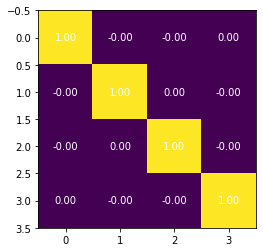

In [184]:
fig, ax = plt.subplots()

draw_heatmap(np.cov(V), ax)